#### import libraries
#### read the data

In [1]:
import numpy as np
import pandas as pd
data=pd.read_csv(r'../input/predict-the-number-of-upvote/data.csv')
data.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


#### Shape of train and test

In [2]:
print('There are {} rows and {} columns in train'.format(data.shape[0],data.shape[1]))

There are 330045 rows and 7 columns in train


#### The column labels of the DataFrame.

In [3]:
data.columns

Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes'], dtype='object')

#### Return the dtypes in the DataFrame.

In [4]:
data.dtypes

ID              int64
Tag            object
Reputation    float64
Answers       float64
Username        int64
Views         float64
Upvotes       float64
dtype: object

#### Drop specified labels(ID) from rows or columns.

In [5]:
data.drop('ID', axis=1, inplace=True)

#### data splitting

In [6]:
X = data[['Tag', 'Reputation', 'Answers', 'Username', 'Views']]
y = data['Upvotes']

#### Generate descriptive statistics from data
#### ‘all’ : All columns of the input will be included in the output.

In [7]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Tag,330045,10,c,72458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reputation,330045.0,NaN,NaN,NaN,7773.146798,27061.412587,0.0,282.0,1236.0,5118.0,1042428.0
Answers,330045.0,NaN,NaN,NaN,3.917672,3.579515,0.0,2.0,3.0,5.0,76.0
Username,330045.0,NaN,NaN,NaN,81442.888803,49215.10073,0.0,39808.0,79010.0,122559.0,175738.0
Views,330045.0,NaN,NaN,NaN,29645.071342,80956.456478,9.0,2594.0,8954.0,26870.0,5231058.0
Upvotes,330045.0,NaN,NaN,NaN,337.505358,3592.441135,0.0,8.0,28.0,107.0,615278.0


##### Generate descriptive statistics from data " To exclude object columns submit the data type numpy.object"|

In [8]:
data.describe(exclude='number').T

,count,unique,top,freq
Tag,330045,10,c,72458


#### This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Tag         330045 non-null  object 
 1   Reputation  330045 non-null  float64
 2   Answers     330045 non-null  float64
 3   Username    330045 non-null  int64  
 4   Views       330045 non-null  float64
 5   Upvotes     330045 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 15.1+ MB


#### Count number of distinct elements in specified axis.

In [10]:
data.nunique()

Tag               10
Reputation     16527
Answers           63
Username      141802
Views          82137
Upvotes         7239
dtype: int64

#### I get a list of the null count for each column

In [11]:
data.isnull().sum()

Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

#### Identify categorical columns 


In [12]:
df_cat=data.select_dtypes(include='object')
list(df_cat.columns)

['Tag']

##### Identify numerical columns


In [13]:
df_num=data.select_dtypes(include=['int64','float64'])
list(df_num.columns)

['Reputation', 'Answers', 'Username', 'Views', 'Upvotes']

### Step 1 : EDA (Exploratory Data Analysis)

array([[<AxesSubplot:title={'center':'Reputation'}>,
        <AxesSubplot:title={'center':'Answers'}>],
       [<AxesSubplot:title={'center':'Username'}>,
        <AxesSubplot:title={'center':'Views'}>],
       [<AxesSubplot:title={'center':'Upvotes'}>, <AxesSubplot:>]],
      dtype=object)

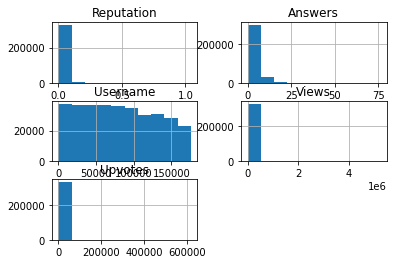

In [14]:
data.hist()

#### Variance selector caveats

<AxesSubplot:>

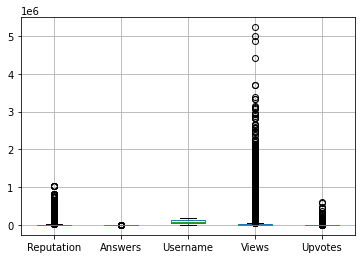

In [15]:
data.boxplot()

#### Explore categorical variables - Tag

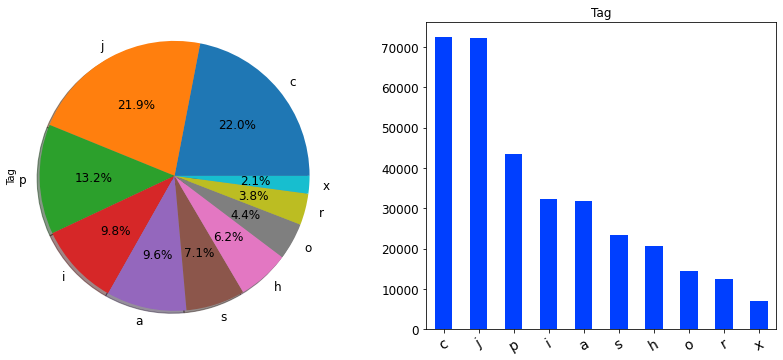

In [16]:

import matplotlib.pyplot as plt
count = 1
for cols in df_cat:
    plt.subplot(1, 2, count)
    data[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.1,textprops={'fontsize': 12} )
    count +=1
    plt.subplot(1, 2, count)
    plt.tight_layout()
    plt.style.use('seaborn-bright')
    data[cols].value_counts().plot.bar()
    fig=plt.gcf()
    fig.set_size_inches(12,5)
    plt.title('{0}'.format(cols))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(rotation=30)
    count+=1

#### Lets visualize above details in boxen plot
#### Numerical Data ['Reputation', 'Answers', 'Username', 'Views', 'Upvotes'] Vs Tag (i.e. categorical variable ) in ascending order of median 

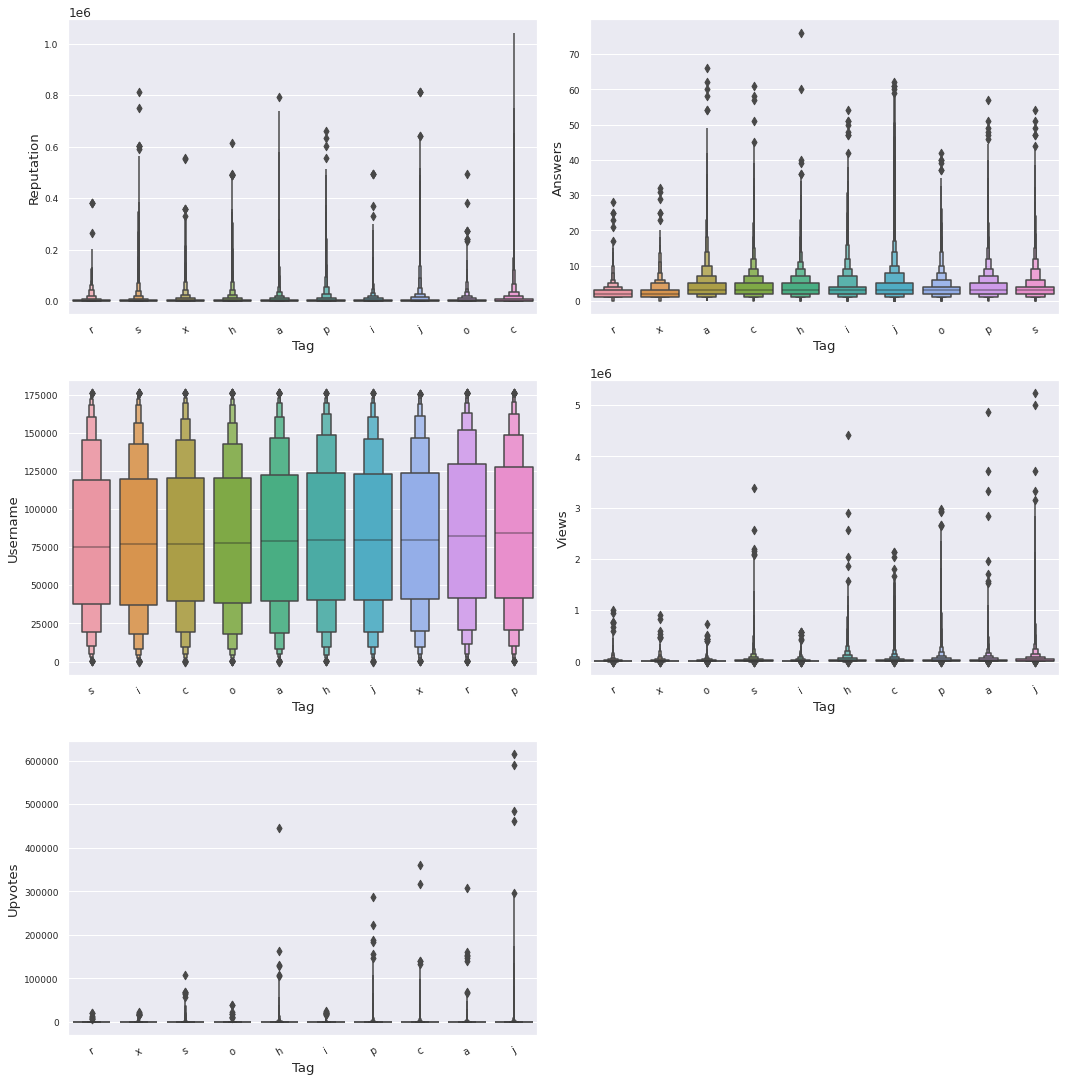

In [17]:
import seaborn as sns
#Lets visualize above details in boxen plot
#Numerical Data ['Reputation', 'Answers', 'Username', 'Views', 'Upvotes'] Vs Tag (i.e. categorical variable ) in ascending order of median 
plt.figure(figsize=(15, 15))
count = 1
for cols in df_num:
    sns.set(style='darkgrid', palette="Set1", font_scale=1.1, rc={"figure.figsize": [12, 12]})
    plt.subplot(3, 2, count)
    plt.tight_layout()
    sorted_nb = data.groupby(['Tag'])[cols].median().sort_values()
    sns.boxenplot(x=data['Tag'], y=data[cols], order=list(sorted_nb.index))
    plt.xticks(rotation=30)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=9)
    
    count+=1

#### Lets do a correlation plot for entire dataframe


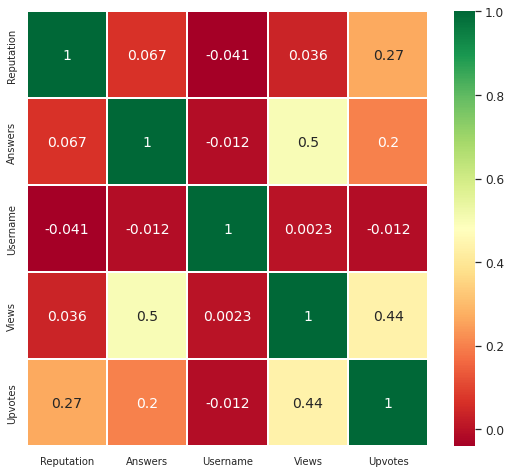

In [18]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':14})
fig=plt.gcf()
fig.set_size_inches(9,8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Transform categorical variable Tag to numbers

In [19]:
#Tag -
Tag_dict = {'a':0, 'c':1,'h':2,'i':3,'j':4,'o':5,'p':6,'r':7,'s':8,'x':9}

# Transform categorical variable Tag to numbers
X["Tag"] = X["Tag"].apply(lambda x: Tag_dict[x])
#Convert 'Tag' to object
X['Tag']  = X['Tag'].astype('int64')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


# Shape of X

In [20]:

print('There are {} rows and {} columns in X'.format(data.shape[0],data.shape[1]))

There are 330045 rows and 6 columns in X


## Model building starts

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

##### After several permutaion and combination, I decided to use xgbregressor to predict which gave nest results

In [22]:
#Import Libraries
from sklearn.ensemble import RandomForestRegressor
#Applying RandomForestRegressor Model 
RandomForestRegressor_model=RandomForestRegressor(n_estimators=100,max_depth=12,min_samples_split=4,random_state=33)
RandomForestRegressor_model.fit(X_train,y_train)
#Calculating Prediction
y_pred_rfr = RandomForestRegressor_model.predict(X_test)
#Calculating Score for train and test
print('the score is {}'.format(RandomForestRegressor_model.score(X_train, y_train)))
#Calculating Score for train and test
print('the score is {}'.format(RandomForestRegressor_model.score(X_test, y_test)))

the score is 0.9725524705304578
the score is 0.845305140683408


### Calculating Median Squared Error


In [23]:

from sklearn.metrics import median_absolute_error
MdSEValue = median_absolute_error(y_test, y_pred_rfr)
print('Median Squared Error Value is : ', MdSEValue )


Median Squared Error Value is :  14.043941674009996


### Calculating Mean Squared Error


In [24]:
from sklearn.metrics import mean_squared_error 
MSEValue = mean_squared_error(y_test, y_pred_rfr, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  1754186.9573777826


### Calculating Mean Absolute Error


In [25]:
from sklearn.metrics import mean_absolute_error
MAEValue = mean_absolute_error(y_test, y_pred_rfr, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

Mean Absolute Error Value is :  107.50914693152993
